<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pylab import *

In [2]:
import seaborn as sns

from collections import Counter

In [3]:
class1= pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
class1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
kf=class1.copy()
class1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff62c62da10>,
      dtype=object)

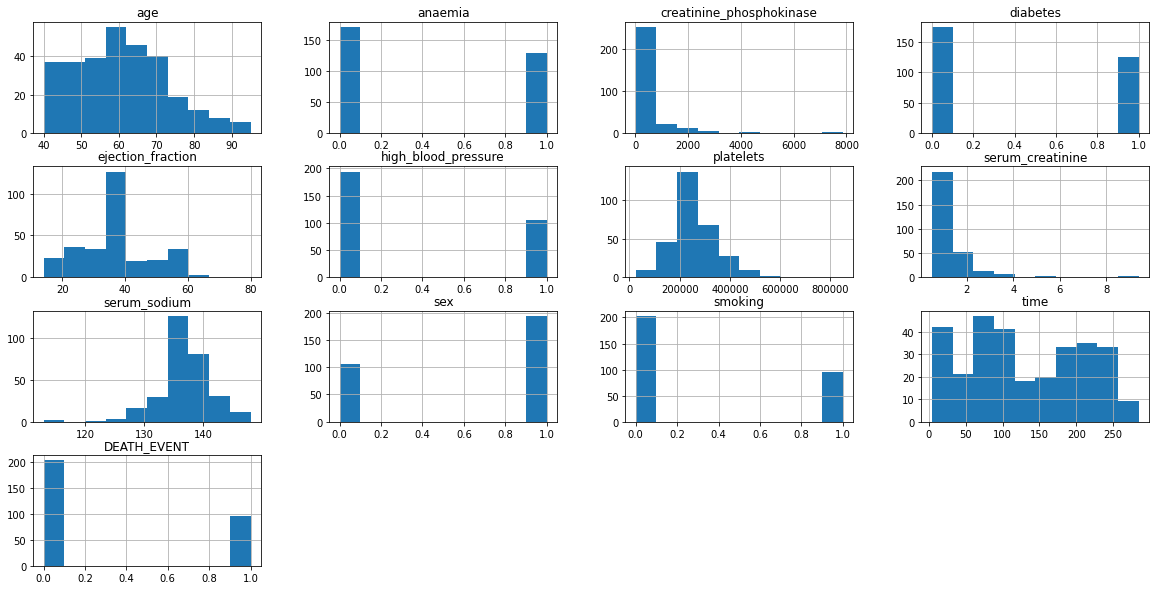

In [13]:
class1.hist(layout=(4,4), figsize=(20,10))

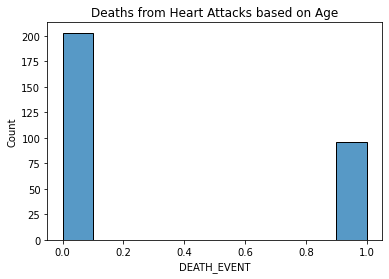

In [112]:
plt.title('Deaths from Heart Attacks based on Age')
sns.histplot(class1.DEATH_EVENT)
plt.show()

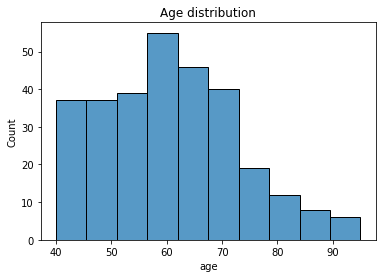

In [8]:
sns.histplot(class1.age)
plt.title('Age distribution')
plt.show()

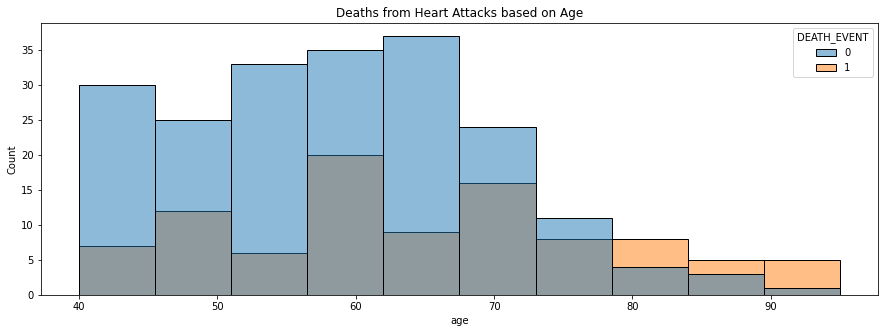

In [9]:
plt.figure(figsize=(15,5))
plt.title('Deaths from Heart Attacks based on Age')
sns.histplot(x="age",hue="DEATH_EVENT",data=class1)
plt.show()

In [386]:
X = class1.iloc[:,[7,4,0]].values
y = class1.iloc[:,[12]]

In [387]:
Counter(y.values.flatten())

Counter({1: 96, 0: 203})

In [407]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=203, weights=[0.5], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0: 102, 1: 101})
Counter({1: 102, 0: 102})


In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=99)

In [401]:
#Check the shape of the training data
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(163,)
(163, 20)
(41,)
(41, 20)


In [402]:
from collections import Counter
Counter(y_train.flatten())

Counter({1: 87, 0: 76})

In [403]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [404]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [405]:
# 1 Algorithm: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(y_test)
print(pred_lr)
print(metrics.accuracy_score(y_test, pred_lr)*100)
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

[0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 1 1 0]
[0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0]
95.1219512195122
[[26  0]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.87      0.93        15

    accuracy                           0.95        41
   macro avg       0.96      0.93      0.95        41
weighted avg       0.95      0.95      0.95        41



In [296]:
#2 Algorithm: KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(y_test)
print(pred_knn)
cm=metrics.confusion_matrix(y_test,pred_knn)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, pred_knn)*100)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1]
[0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 1]
98.76543209876543
[[46  1]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.97      1.00      0.99        34

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



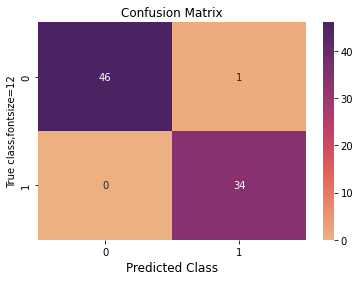

In [297]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [299]:
#3 Algorithm: Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion = 'entropy',random_state=42)
classifier.fit(X_train,y_train)

#predicting the test set results
y_pred=classifier.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1]


In [300]:
print(y_test)
cm=metrics.confusion_matrix(y_test,y_pred)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1]
100.0
[[47  0]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        34

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [301]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('----------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print(result)

accuracy:1.00


Confusion Matrix:
[[47  0]
 [ 0 34]] 


----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        34

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



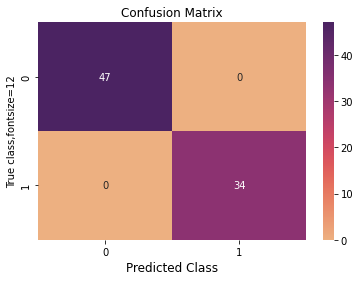

In [302]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [278]:
import tensorflow as tf

In [279]:

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [281]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(3,), activation='relu'))
#model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [282]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [283]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 1s 4ms/step - loss: 0.7230 - accuracy: 0.6904
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.6946
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.6946
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.6946
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6946
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.6946
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6946
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6946
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.6946
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6946
Epoch 11/50
24/24 [

In [284]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 32        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [285]:
class_weights={0:1,1:6,2:7}
history=model.fit(X_train,y_train,batch_size=10,epochs=50,class_weight=class_weights,validation_split=0.3)

Epoch 1/50
17/17 [==============================] - 0s 13ms/step - loss: 1.7344 - accuracy: 0.7844 - val_loss: 0.5079 - val_accuracy: 0.8056
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 1.5726 - accuracy: 0.7365 - val_loss: 0.5071 - val_accuracy: 0.7917
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 1.4560 - accuracy: 0.7365 - val_loss: 0.5163 - val_accuracy: 0.7778
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 1.3694 - accuracy: 0.7066 - val_loss: 0.5257 - val_accuracy: 0.7778
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 1.3178 - accuracy: 0.7006 - val_loss: 0.5352 - val_accuracy: 0.7778
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 1.2831 - accuracy: 0.6886 - val_loss: 0.5465 - val_accuracy: 0.7361
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 1.2553 - accuracy: 0.7006 - val_loss: 0.5572 - val_accuracy: 0.7222
Epoch 8/50
17/17 [=

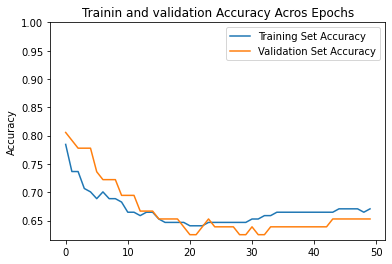

In [286]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']

plt.plot(accuracy,label='Training Set Accuracy')
plt.plot(validation_accuracy,label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Trainin and validation Accuracy Acros Epochs')
plt.legend()

In [27]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=150, batch_size=10)

Epoch 1/150
21/21 [==============================] - 0s 11ms/step - loss: 0.6754 - accuracy: 0.6699 - val_loss: 0.6527 - val_accuracy: 0.6778
Epoch 2/150
21/21 [==============================] - 0s 10ms/step - loss: 0.6486 - accuracy: 0.6842 - val_loss: 0.6313 - val_accuracy: 0.6889
Epoch 3/150
21/21 [==============================] - 0s 10ms/step - loss: 0.6210 - accuracy: 0.6890 - val_loss: 0.6115 - val_accuracy: 0.7000
Epoch 4/150
21/21 [==============================] - 0s 7ms/step - loss: 0.5960 - accuracy: 0.6890 - val_loss: 0.5954 - val_accuracy: 0.7000
Epoch 5/150
21/21 [==============================] - 0s 6ms/step - loss: 0.5756 - accuracy: 0.6890 - val_loss: 0.5812 - val_accuracy: 0.7111
Epoch 6/150
21/21 [==============================] - 0s 9ms/step - loss: 0.5578 - accuracy: 0.6986 - val_loss: 0.5694 - val_accuracy: 0.7111
Epoch 7/150
21/21 [==============================] - 0s 9ms/step - loss: 0.5425 - accuracy: 0.7177 - val_loss: 0.5593 - val_accuracy: 0.7333
Epoch 8/15

In [28]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 55.55555555555556


In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: ignored

In [ ]:
#3 Algorithm: Neural Networks
nn = MLPClassifier(hidden_layer_sizes =(200, 200, 200), activation = 'relu', max_iter = 500)
nn.fit(X_train, y_train)
pred_nn = nn.predict(X_test)
print(y_test)
print(pred_nn)
print(metrics.accuracy_score(y_test, pred_nn)*100)
print(confusion_matrix(y_test, pred_nn))
print(classification_report(y_test, pred_nn))